In [68]:
import pandas as pd
import numpy as np

In [69]:
df=pd.read_csv('data.csv')

Splitting Data to Train and Test part

In [70]:
from sklearn.model_selection import train_test_split
features=df.drop('OS',axis=1)
target=df.OS
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.15,random_state=42)

Prepration of Train Data

In [71]:
def getOS(x):
    return x.split(' ')[0]
target_train=target_train.apply(getOS)
def OS_reDefine(x):
     if (x=='Android')  or (x=='iOS'):
          return x
     else: return 'other'
target_train=target_train.apply(OS_reDefine)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
target_train=pd.DataFrame(le.fit_transform(target_train),columns=['OS'])

In [72]:
features_train.drop(['Unnamed: 0','brand','name','Status','WLAN','Colors','Sensors','Bluetooth','GPU','Loudspeaker','Display Type',
                 '3.5mm jack','Chipset','Network','Internal','Card slot','2G','3G'],axis=1,inplace=True)

In [73]:

features_train['4G']=features_train['4G'].map({True:1,False:0})
features_train['5G']=features_train['5G'].map({True:1,False:0})
def getLength(x):
        a=x.split(' ')
        if a[0]=='Unfolded:': 
                return float(a[1])
        else:
                return float(a[0])
features_train.Length=features_train.Length.apply(getLength)
def getWidth(x):
        return float(x.split('mm')[0])
features_train.Width=features_train.Width.apply(getWidth)
def getDiameter(x):
        return float(x.split('-')[0])
features_train.Diameter=features_train.Diameter.apply(getDiameter)
features_train.SIM=features_train.SIM.map({'eSIM':0,'Mini-SIM':1,'Micro-SIM':2,'Nano-SIM':3})
def getRatio(x):
    return int(x.split(':')[0])/int(x.split(':')[1])
features_train.ratio=features_train.ratio.apply(getRatio)
features_train.CPU=features_train.CPU.fillna(features_train.CPU.median())

In [74]:
def Binning_BC(x):
    if x<= features_train.battery_capacity.quantile(0.33):
        return 1
    if x<= features_train.battery_capacity.quantile(0.66):
        return 2
    else: return 3
features_train.battery_capacity=features_train.battery_capacity.apply(Binning_BC)

In [75]:
features_train.battery_capacity.value_counts()

battery_capacity
2    825
1    746
3    682
Name: count, dtype: int64

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score
from collections import Counter

X=features_train
y=target_train.OS


X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.15,random_state=42)

sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_val_scaled=sc.transform(X_val)

sm=SMOTE(random_state=42)

X_train_resampled, y_train_resampled=sm.fit_resample(X_train_scaled,y_train)

print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_train_resampled))


rfc=RandomForestClassifier(criterion='entropy',max_depth=15,n_estimators=100,random_state=42)



rfc.fit(X_train_resampled,y_train_resampled)


y_pred=rfc.predict(X_train_scaled)
print('Train Accuracy:',f1_score(y_train,y_pred, average='weighted'))
print('Train F1:',f1_score(y_train,y_pred,average='weighted'))

y_pred=rfc.predict(X_val_scaled)
print('Test Accuracy:',accuracy_score(y_val,y_pred))
print('Test F1:',f1_score(y_val,y_pred,average='weighted'))
print('Test recission:',precision_score(y_val,y_pred,average='weighted'))
print('Test Recall:',recall_score(y_val,y_pred,average='weighted'))


print('Feature Importances:',rfc.feature_importances_)

Original dataset shape: Counter({0: 1760, 2: 109, 1: 46})
Resampled dataset shape: Counter({0: 1760, 2: 1760, 1: 1760})
Train Accuracy: 1.0
Train F1: 1.0
Test Accuracy: 0.9733727810650887
Test F1: 0.9719354598990253
Test recission: 0.9715464269458353
Test Recall: 0.9733727810650887
Feature Importances: [0.01929347 0.01043143 0.05422278 0.02926363 0.05239796 0.04398247
 0.10513949 0.10313653 0.04941621 0.05485562 0.03789426 0.01823722
 0.02387374 0.1223405  0.06231734 0.07998475 0.06279797 0.07041463]


Text(50.722222222222214, 0.5, 'True Lables')

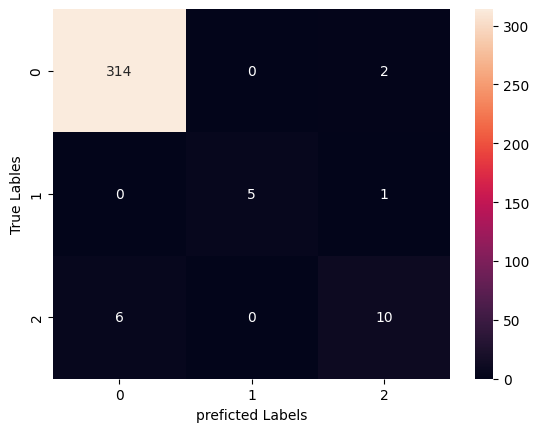

In [77]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_val,y_pred) 


sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("preficted Labels")
plt.ylabel("True Lables")

<Axes: >

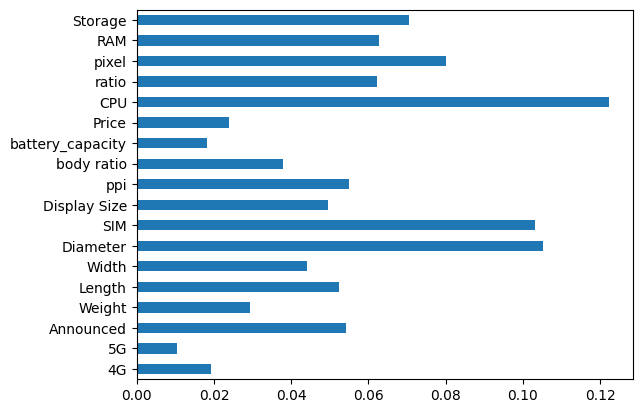

In [78]:
import matplotlib.pyplot as plt
pd.Series(rfc.feature_importances_,index=X.columns).plot(kind='barh')

##model

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X_train=features_train
y_train=target_train.OS



sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)



sm=SMOTE(random_state=42)

X_train_resampled, y_train_resampled=sm.fit_resample(X_train_scaled,y_train)

model=RandomForestClassifier(criterion='entropy',max_depth=15,n_estimators=100,random_state=42)

model.fit(X_train_resampled,y_train_resampled)


RandomForestClassifier(criterion='entropy', max_depth=15, random_state=42)

Test

In [80]:

target_test=target_test.apply(getOS)

target_test=target_test.apply(OS_reDefine)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
target_test=pd.DataFrame(le.fit_transform(target_test),columns=['OS'])



features_test['4G']=features_test['4G'].map({True:1,False:0})
features_test['5G']=features_test['5G'].map({True:1,False:0})


features_test.Length=features_test.Length.apply(getLength)


features_test.Width=features_test.Width.apply(getWidth)

features_test.Diameter=features_test.Diameter.apply(getDiameter)

features_test.SIM=features_test.SIM.map({'eSIM':0,'Mini-SIM':1,'Micro-SIM':2,'Nano-SIM':3})

features_test.ratio=features_test.ratio.apply(getRatio)

features_test.CPU=features_test.CPU.fillna(features_test.CPU.median())


features_test.drop(['Unnamed: 0','brand','name','Status','WLAN','Colors','Sensors','Bluetooth','GPU','Loudspeaker',
                 '3.5mm jack','Chipset','Network','Internal','Card slot','Display Type','brand','2G','3G'],axis=1,inplace=True)


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score
from pprint import pprint

X_test=features_test
y_test=target_test.OS

X_test_scaled=sc.transform(X_test)


y_pred=model.predict(X_test_scaled)
print('Test Accuracy:',accuracy_score(y_test,y_pred))
print('Test F1:',f1_score(y_test,y_pred,average='weighted'))
print('Test recission:',precision_score(y_test,y_pred,average='weighted'))
print('Test Recall:',recall_score(y_test,y_pred,average='weighted'))




Test Accuracy: 0.964824120603015
Test F1: 0.9584622130630537
Test recission: 0.9622528225543301
Test Recall: 0.964824120603015


Text(50.722222222222214, 0.5, 'True Lables')

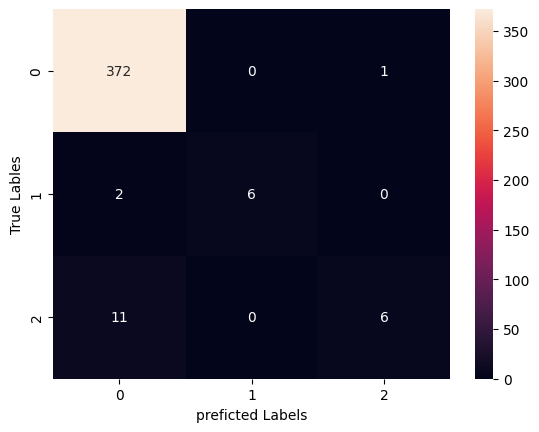

In [82]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test,y_pred) 


sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("preficted Labels")
plt.ylabel("True Lables")

In [83]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
lb=LabelBinarizer()
lb.fit(y_test)
roc_auc_score(lb.transform(y_test),lb.transform(y_pred),average='weighted')

0.7386876640419947